In [ ]:
##Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

**Exploratory Data Analysis and cleaning data for processing**

In [ ]:
data = pd.read_excel('https://github.com/ShriramDayama/flight-fare-prediction/blob/main/Data_Train.xlsx?raw=true')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.dropna(inplace= True)
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
data = data.drop('Additional_Info',  axis = 'columns')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302


In [ ]:
data['Duration_minutes'] = (pd.to_timedelta(data['Duration']).dt.seconds/60)
data = data.drop('Duration', axis = 'columns')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,3897,170.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,7662,445.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,13882,1140.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,6218,325.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,13302,285.0


In [ ]:
data = data.drop('Route', axis = 'columns')
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,3897,170.0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,2 stops,7662,445.0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,13882,1140.0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,1 stop,6218,325.0
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,1 stop,13302,285.0


In [ ]:

data['Day'] = pd.to_datetime(data['Date_of_Journey'], format = '%d/%m/%Y').dt.day
data['Month'] = pd.to_datetime(data['Date_of_Journey'], format = '%d/%m/%Y').dt.month
data = data.drop('Date_of_Journey' , axis = 'columns' )

In [ ]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,3897,170.0,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,7662,445.0,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,13882,1140.0,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,1 stop,6218,325.0,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,1 stop,13302,285.0,1,3


In [ ]:
data['Dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_minute'] = pd.to_datetime(data['Dep_Time']).dt.minute
data['Arrival_hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_minute'] = pd.to_datetime(data['Arrival_Time']).dt.minute
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_minutes,Day,Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,3897,170.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,7662,445.0,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,13882,1140.0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,1 stop,6218,325.0,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,16:50,21:35,1 stop,13302,285.0,1,3,16,50,21,35


In [ ]:
data = data.drop('Dep_Time' , axis = 'columns')
data = data.drop('Arrival_Time' , axis = 'columns')
data.head()

,Airline,Source,Destination,Total_Stops,Price,Duration_minutes,Day,Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,170.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,445.0,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,13882,1140.0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,325.0,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,13302,285.0,1,3,16,50,21,35


In [ ]:
airline = pd.get_dummies(data.Airline)
airline = airline.drop('GoAir', axis = 'columns')
airline

,Air Asia,Air India,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
destination = pd.get_dummies(data.Destination, drop_first = True , prefix= "Destination_")
destination.head()

,Destination__Cochin,Destination__Delhi,Destination__Hyderabad,Destination__Kolkata,Destination__New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
source = pd.get_dummies(data.Source, drop_first = True , prefix= "Source_")
source.head()

,Source__Chennai,Source__Delhi,Source__Kolkata,Source__Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
data.replace({'non-stop' : 0, '1 stop' : 1, '2 stops' : 2 , '3 stops' : 3 , '4 stops' : 4} , inplace = True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Duration_minutes,Day,Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,0,3897,170.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2,7662,445.0,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,13882,1140.0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,6218,325.0,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,13302,285.0,1,3,16,50,21,35


In [ ]:
final_data = pd.concat([data , airline ,  destination , source], axis = 'columns' )
final_data = final_data.drop('Airline' , axis =1)
final_data = final_data.drop('Source', axis =1)
final_data = final_data.drop('Destination' , axis =1)
final_data.head()

,Total_Stops,Price,Duration_minutes,Day,Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Air Asia,...,Vistara Premium economy,Destination__Cochin,Destination__Delhi,Destination__Hyderabad,Destination__Kolkata,Destination__New Delhi,Source__Chennai,Source__Delhi,Source__Kolkata,Source__Mumbai
0,0,3897,170.0,24,3,22,20,1,10,0,...,0,0,0,0,0,1,0,0,0,0
1,2,7662,445.0,1,5,5,50,13,15,0,...,0,0,0,0,0,0,0,0,1,0
2,2,13882,1140.0,9,6,9,25,4,25,0,...,0,1,0,0,0,0,0,1,0,0
3,1,6218,325.0,12,5,18,5,23,30,0,...,0,0,0,0,0,0,0,0,1,0
4,1,13302,285.0,1,3,16,50,21,35,0,...,0,0,0,0,0,1,0,0,0,0


### **Analysis correlation between independent variables**

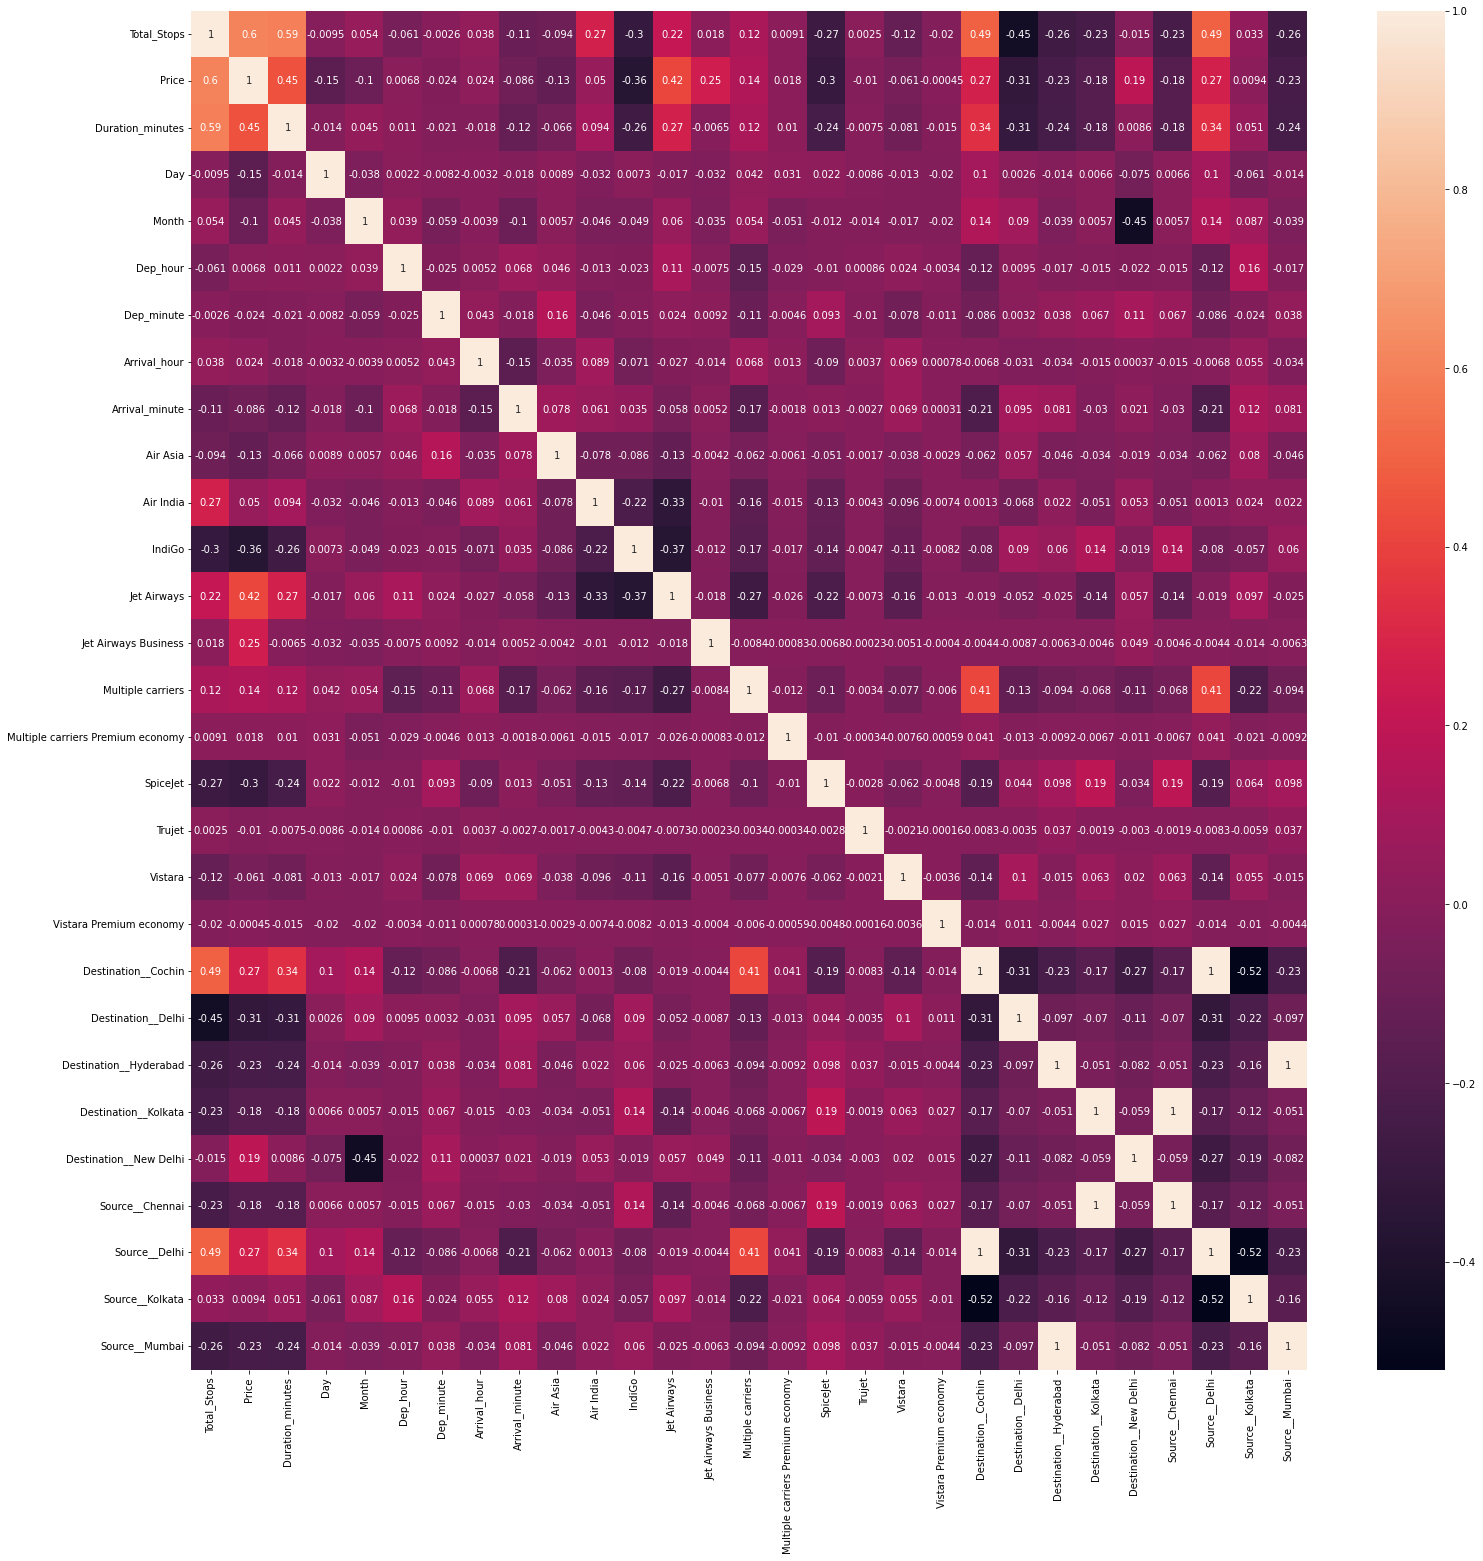

In [ ]:
corr = final_data.corr()
plt.figure(figsize = (25,25))
sn.heatmap(corr , annot = True)

# **Selecting regressor and regressand**

In [ ]:
y = final_data.Price
X = final_data.drop('Price' , axis = 1)
X.head()

,Total_Stops,Duration_minutes,Day,Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Air Asia,Air India,...,Vistara Premium economy,Destination__Cochin,Destination__Delhi,Destination__Hyderabad,Destination__Kolkata,Destination__New Delhi,Source__Chennai,Source__Delhi,Source__Kolkata,Source__Mumbai
0,0,170.0,24,3,22,20,1,10,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,445.0,1,5,5,50,13,15,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2,1140.0,9,6,9,25,4,25,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,325.0,12,5,18,5,23,30,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,285.0,1,3,16,50,21,35,0,0,...,0,0,0,0,0,1,0,0,0,0


# **Splitting data into training and test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2 , random_state= 42)

In [ ]:
##Importing and fitting random forest regression on data
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train , y_train)

RandomForestRegressor()

In [ ]:
##Testing model accuracy 
model.score(X_test, y_test)

0.8394006178801493

In [ ]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


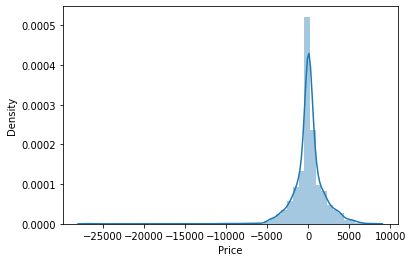

In [ ]:
## Checking residual graph for normalcy
sn.distplot(y_pred - y_test)
plt.show()

# **Finding best parameters using RandomizedSearchcv**

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
max_features = ['auto' , 'sqrt']
max_depth = [int(x) for x in np.linspace(5 , 50 , 5)]

In [ ]:
random_grid = { 
                'max_features' : max_features,
                'max_depth' : max_depth,
                
                }

In [ ]:
rf_random = RandomizedSearchCV(estimator = model , param_distributions =  random_grid  , n_iter = 5  , cv = 5)

In [ ]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [5, 16, 27, 38, 50],
                                        'max_features': ['auto', 'sqrt']})

In [ ]:
rf_random.best_params_

{'max_features': 'auto', 'max_depth': 16}

In [ ]:
rf_random.score(X_test,y_test)

0.8524722444979825

In [ ]:
pred = rf_random.predict(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


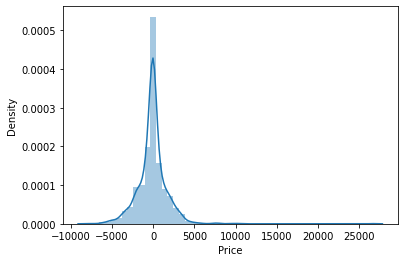

In [ ]:
sn.distplot(y_test - pred)
plt.show()

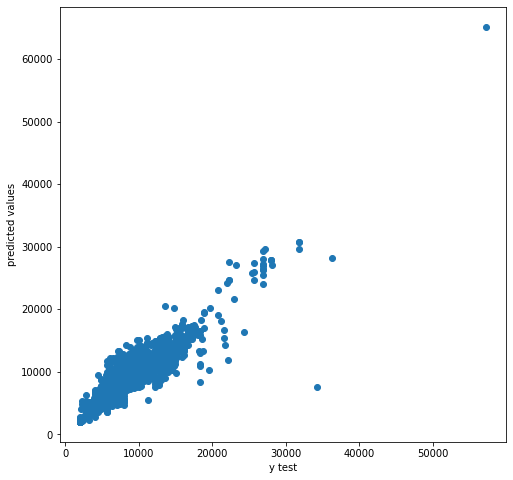

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, pred)
plt.xlabel('y test')
plt.ylabel('predicted values')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, pred)

0.8524722444979825

# **Exporting model**

In [ ]:
import pickle
file = open('Flight_fare_prediction.pkl' , 'wb')
pickle.dump(rf_random, file)

In [ ]:
model = open('Flight_fare_prediction.pkl' , 'rb')
fare = pickle.load(model)